# Linear Regression - Polynomial Fitting in Python.



In [1]:
# Import libraries needed:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
%matplotlib inline

# Set global font size for plots:
mpl.rcParams['font.size'] = 14
# (see https://matplotlib.org/tutorials/introductory/customizing.html).

## 1. Simple polynomial fit:

Fit to a polynomial function of the form:
    
$$ y(x)=a_0 x^n + a_1 x^{n-1} + a_2 x^{n-2} + \ldots + a_n x^n .$$

Note that the coefficients are ordered from highest to lowest power of $x$ here, as this is how the np.polyfit function, used below, returns them. 

In [2]:
## Generate data to fit, generate data that follows a 3rd-order polynomial, with some random noise on top:
#x = np.arange(0,11)                     # x values  
#y0 = 100 + (x-5)**3 - 10*x^2            # 5th-order polynomial.
## The polynomial y0 is equivalent to y(x) = x^3 - 25x^2 +75x-25.
#plt.plot(x, y0, '-')                  # plot underlying equation.
#mu, sigma = 0, 10                       # mean and standard deviation of Gaussian noise.
#s = np.random.normal(mu, sigma, 11)     # generate random number chosen from Gaussian distribution.
#y = y0 + s                              # add random noise to original y0 values.
#plt.plot(x, y, 'ro')
#print(y)

The (x,y) data to fit is:

In [3]:
x = np.array(np.arange(0,11))
y = np.array([-23.60,30.84,63.40,67.76,56.13,56.73,30.22,48.06,41.31,71.52,135.68])

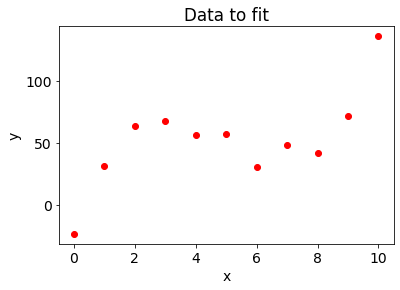

In [4]:
plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data to fit');
plt.savefig('poly_data.eps', format='eps')   
plt.savefig('poly_data.png', format='png')   

The function takes low values for low $x$ and high values for high $x$ and appears to have **odd symmetry**.

Perform a fit to a **3rd-order polynomial without weighting**:

$$y(x)=a_0 x^3 + a_1 x^2 + a_2 x + a_3 . $$

The independent variable is $x$ and the unknown parameters to be found via fitting (linear regression) are $a_0$, $a_1$, $a_2$ and $a_3$. 

We will obtain the fit parameters and their uncertainties from the covariance matrix using the **np.polyfit** function. This function implements linear least-squares fitting (minimises sum of square of residuals).

Note how **we do not need to provide initial guesses** for the fit parameters, as in **linear regression** (fitting a model that is linear in the fit parameters), analytical solutions can typically be found for the best estimates of the fit parameters.

In [5]:
degree = 3      # Degree of polynomial we want to fit.
fit, cvm = np.polyfit(x, y, degree, cov=True) # fit function
# Outputs of np.polyfit are fit parameters (fit) and covariance matrix (cvm).
# The fit parameters, i.e., the polynomial coefficients are in order from highest to lowest power of x. 
# Hence, we have a_0 = fit[0], a_1 = fit[1], a_2 = fit[2] and a_3 = fit[3].

# The diagonal elements of the covariance matrix are the variance estimates for each coefficient.
# Hence, to obtain the uncertainties of the fit parameters, we get the diagonal elements
# of the covariance matrix and take the square root:
err = np.sqrt(np.diag(cvm))
# The error in a_0 is err[0]; the error in a_1 is err[1]; the error in a_2 is err[2]; the error in a_3 is err[3].

# Print fit parameters with their errors (to 2 decimal places):
[print("a_{0} = {1:0.2f} \xb1 {2:0.2f}".format(i, fit[i], err[i])) for i in range(len(fit))];
# The previous command uses "list comprehension" in Python.

a_0 = 1.13 ± 0.09
a_1 = -16.83 ± 1.42
a_2 = 70.61 ± 5.91
a_3 = -23.23 ± 6.49


Plot an overlay of the data points and the resulting fit:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


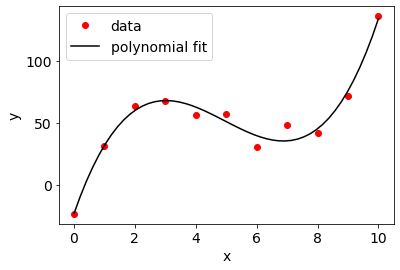

In [6]:
xline = np.array(np.linspace(0,10,50))   # create array (50 points) to plot a smooth fitted line.
yline = fit[0]*xline**3 + fit[1]*xline**2 + fit[2]*xline + fit[3]          # calculate fitted line.
# A much quicker way to do the above is to use np.poly1d (see https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html#numpy.poly1d).

plt.plot(x, y, 'ro', label="data")                    # plot data as red circles.
plt.plot(xline, yline, 'k', label="polynomial fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_fit.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('poly_fit.png', format='png')   # save figure to current folder (place before plt.show()).
plt.show()

## 2. Weighted polynomial fit:

In this case, we use the same data and we perform a weighted fit making use of the different error bars of the data points.

In [7]:
# Vertical error bars (y error bars; I use previous random errors s in absolute value here):
errory = np.array([3.40,6.84,8.40,7.76,0.87,8.73,12.78,12.1,3.69,0.48,8.68])

Perform weighted fit using option/parameter w in the np.polyfit method:

In [8]:
# Enter errors as array 1/sigma (here 1/errory) for Gaussian uncertainties (not 1/sigma**2), 
# see https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). 
fit, cvm = np.polyfit(x,y,degree,w=1/errory,cov='unscaled')
# Outputs and errors of fitted parameters are same as before.
err = np.sqrt(np.diag(cvm))
# Print fit parameters with their errors (to 2 decimal places):
[print("a_{0} = {1:0.2f} \xb1 {2:0.2f}".format(i,fit[i],err[i])) for i in range(len(fit))];

a_0 = 1.12 ± 0.08
a_1 = -16.37 ± 1.04
a_2 = 67.49 ± 3.36
a_3 = -23.01 ± 3.26


Plot the data points together with the fit:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


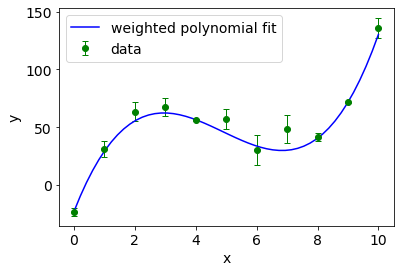

In [9]:
xline = np.array(np.linspace(0,10,50))   # create array (50 points) to plot a smooth fitted line.
yline = fit[0]*xline**3 + fit[1]*xline**2 + fit[2]*xline + fit[3]          # calculate fitted line.

# Plot points with error bars:
plt.errorbar(x, y, yerr = errory, fmt="go", linewidth=1, capsize=3, label="data")
plt.plot(xline, yline,'b', label="weighted polynomial fit")
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_fit_weighted.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('poly_fit_weighted.png', format='png')   # save figure to current folder (place before plt.show()).
plt.show()

Note that it is also possible to use a non-linear regression algorithm, such as **scipy.optimize.curve_fit** to perfom a linear regression, as the method also works (no initial guesses of parameters needed). The results are approximately the same as those using **np.polyfit**, but the uncertainties are slightly larger:

In [10]:
# Define polynomial function:
def poly3(x, a0, a1, a2, a3):
    '''Third order polynomial, independent variable is x.'''
    return a0*x**3 + a1*x**2 + a2*x + a3

popt, pcov = curve_fit(poly3, x, y) # fit function
# Outputs of curve_fit are fit parameters (popt) and covariance matrix (pcov).
# The fit parameters are in the same order as in the function fitted.

# The sqrt of the diagonal elements of the covariance matrix are uncertainties of the fit parameters:
err = np.sqrt(np.diag(pcov))
# Print fit parameters with their errors (to 2 decimal places):
[print("a_{0} = {1:0.2f} \xb1 {2:0.2f}".format(i,popt[i],err[i])) for i in range(len(popt))];

a_0 = 1.13 ± 0.09
a_1 = -16.83 ± 1.42
a_2 = 70.61 ± 5.91
a_3 = -23.23 ± 6.49
